# keras nn(sequential)



In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels),(test_images,test_labels)=\
fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


[9 0 0 3]


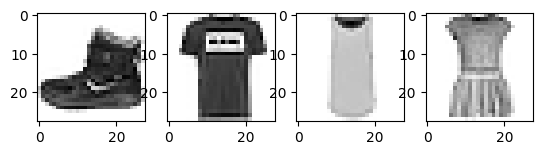

In [2]:
fig  = plt.figure()
ax1 = fig.add_subplot(1,4,1)
ax2 = fig.add_subplot(1,4,2)
ax3 = fig.add_subplot(1,4,3)
ax4 = fig.add_subplot(1,4,4)

ax1.imshow(train_images[0], cmap='Greys')
ax2.imshow(train_images[1], cmap='Greys')
ax3.imshow(train_images[2], cmap='Greys')
ax4.imshow(train_images[3], cmap='Greys')
print(train_labels[:4]) #레이블출력

In [3]:
#데이터 학습시키기 위한 모델 만들기(구조설계)
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(256,activation='relu'), #은닉층
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

In [4]:
#학습, 평가
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', #손실함수->최적화기법(adam)
              metrics=['accuracy'])

train_images, test_images = train_images/255, test_images/255
model.fit(train_images,train_labels, epochs=5)

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("\n테스트 정확도:", test_acc)

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4867 - accuracy: 0.8230
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3639 - accuracy: 0.8670
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3279 - accuracy: 0.8780
Epoch 4/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3048 - accuracy: 0.8855
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2877 - accuracy: 0.8926
313/313 - 1s - loss: 0.3387 - accuracy: 0.8801 - 820ms/epoch - 3ms/step

테스트 정확도: 0.8801000118255615


#흐림 필터적용하기(합성곱필터)

Text(0.5, 1.0, 'sample image: china.jpg')

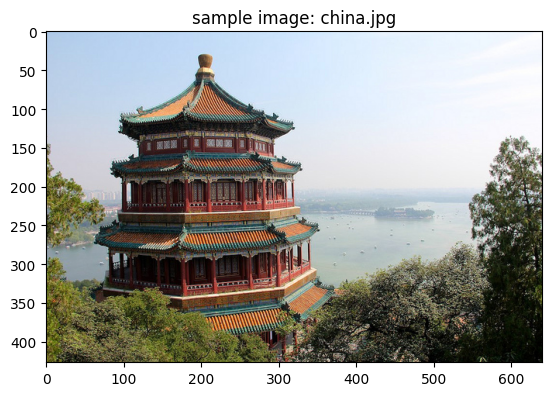

In [5]:
import numpy as np
from sklearn.datasets import load_sample_image
import matplotlib.pyplot as plt
import cv2

china = load_sample_image('china.jpg')
plt.imshow(china)
plt.title('sample image: china.jpg')

In [6]:
print('shape:',china.shape)
print('dtype:',china.dtype)

shape: (427, 640, 3)
dtype: uint8


Text(0.5, 1.0, '9x9')

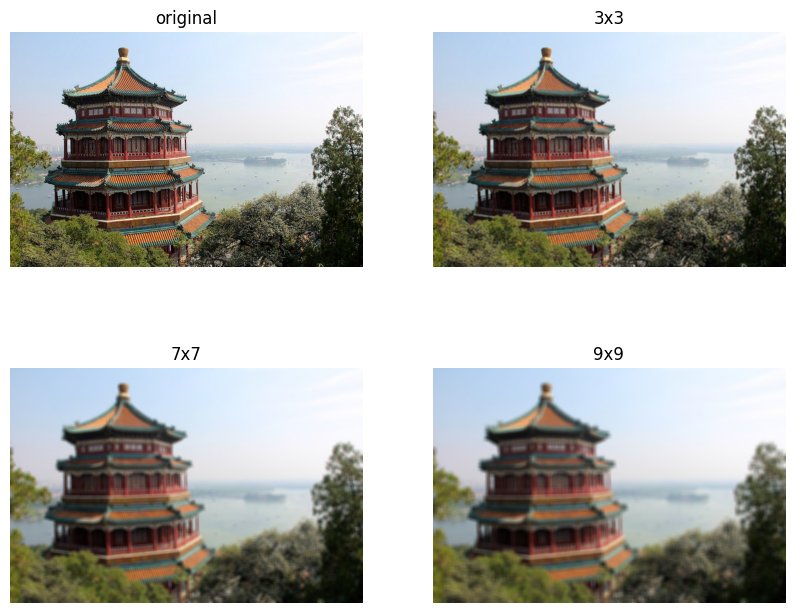

In [ ]:
def blur_filter(img,n):
  filter = np.ones((n,n),np.float32)/(n*n)
  blurred=  cv2.filter2D(img,-1,filter)
  return blurred

fig, ax = plt.subplots(2,2,figsize=(10,8))
ax[0,0].imshow(china)
ax[0,0].axis('off')
ax[0,0].set_title('original')

ax[0,1].imshow(blur_filter(china,3)) #3x3
ax[0,1].axis('off')
ax[0,1].set_title('3x3')

ax[1,0].imshow(blur_filter(china,7)) # 7x7
ax[1,0].axis('off')
ax[1,0].set_title('7x7')

ax[1,1].imshow(blur_filter(china,9))
ax[1,1].axis('off')
ax[1,1].set_title('9x9')

#경계검출 필터

Text(0.5, 1.0, 'edge x')

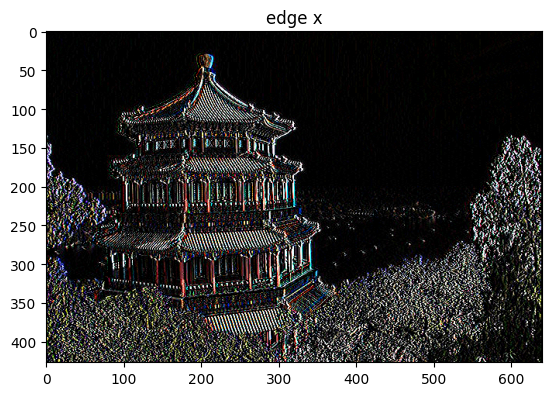

In [7]:
#수직강조
v_filter = np.array([[-4,0,4]]) #세로모서리 강조
v_filterd = cv2.filter2D(china, -1,v_filter)
plt.imshow(v_filterd)
plt.title('edge x')

Text(0.5, 1.0, 'edge y')

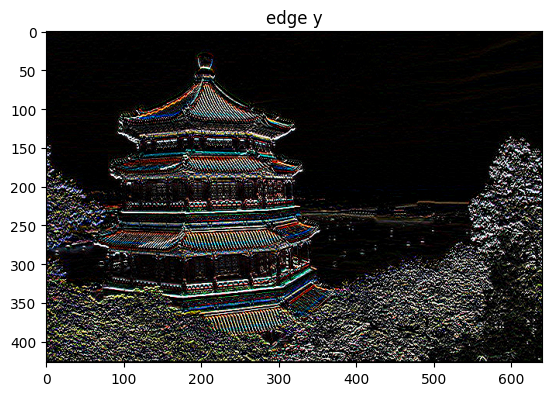

In [ ]:
#수평강조
h_filter = np.array([[-4],[0],[4]]) #가로모서리 강조
h_filterd = cv2.filter2D(china, -1,h_filter)
plt.imshow(h_filterd)
plt.title('edge y')
#주변색과 차이가 없는 경우 필터=0

#합성곱 신경망 모델

In [8]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels),(test_images,test_labels)=\
fashion_mnist.load_data()

train_image = train_images[:,:,:,np.newaxis] #(인스턴스수, 행,열,채널수)
test_image = test_images[:,:,:,np.newaxis]
train_image , test_image = train_images/255, test_images/255

In [9]:
#데이터 학습시키기 위한 모델 만들기
model = keras.models.Sequential([       #keras의 sequential로 계층 쌓기
    keras.layers.Conv2D(input_shape=(28,28,1),
                        kernel_size = (3,3),padding = 'same',
                        filters=32), #합성곱
    keras.layers.MaxPooling2D((2,2),strides=2), #최대값 풀링
    #keras.layers.Dropout(.2),     #드롭아웃층 추가-> 오버피팅문제 해결(강건한네트워크)
    keras.layers.Conv2D(kernel_size = (3,3),padding = 'same',
                        filters=64),
    keras.layers.MaxPooling2D((2,2),strides=2),
    keras.layers.Conv2D(kernel_size = (3,3),padding = 'same',
                        filters=32),
    keras.layers.Flatten(), # cnn 최종단계: 평탄화
    keras.layers.Dense(128,activation='relu'), #은닉층
    #keras.layers.Dropout(.2),           #교차검증위해 드롭아웃층 추                          
    keras.layers.Dense(32,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 32)         

Epoch 1/5
1407/1407 [==============================] - 90s 63ms/step - loss: 0.9071 - accuracy: 0.7636 - val_loss: 0.4630 - val_accuracy: 0.8347
Epoch 2/5
1407/1407 [==============================] - 87s 62ms/step - loss: 0.4070 - accuracy: 0.8531 - val_loss: 0.3973 - val_accuracy: 0.8603
Epoch 3/5
1407/1407 [==============================] - 94s 67ms/step - loss: 0.3562 - accuracy: 0.8718 - val_loss: 0.3278 - val_accuracy: 0.8861
Epoch 4/5
1407/1407 [==============================] - 84s 60ms/step - loss: 0.3305 - accuracy: 0.8801 - val_loss: 0.3503 - val_accuracy: 0.8777
Epoch 5/5
1407/1407 [==============================] - 97s 69ms/step - loss: 0.3160 - accuracy: 0.8856 - val_loss: 0.3425 - val_accuracy: 0.8792


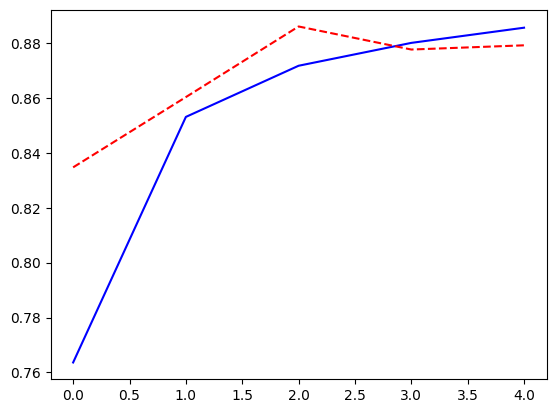

In [10]:
#모델 훈련시켜 성능알아보기(교차검증기법)
model.compile(optimizer='adam', #최적화기법(adam)
              loss='sparse_categorical_crossentropy', #손실함수
              metrics=['accuracy'])
hist = model.fit(train_images,train_labels, epochs=5, 
                 validation_split=0.25) # 75%는 훈련학습/ 25%는 검증에 사용 (교차검증)

plt.plot(hist.history['accuracy'],'b-') #정확도
plt.plot(hist.history['val_accuracy'],'r--') #검증정확도

In [ ]:
#test 데이터 이용해 학습결과 테스트하기
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("\n테스트 정확도:", test_acc)